In [7]:
import pandas as pd
file_path = "/content/insurance.csv"
dataset = pd.read_csv(file_path)
print(dataset.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [8]:
print("dataset shape:")
print(dataset.shape)

dataset shape:
(1338, 7)


In [9]:
print("columns:")
print(dataset.columns)

columns:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [14]:

# 1. Vectors
vector_age = insurance_data['age']
print("\nVector (Age):\n", vector_age.head())

# 2. Factors
factor_smoker = pd.Categorical(insurance_data['smoker'])
print("\nFactor (Smoker):\n", factor_smoker)

# 3. Lists
example_list = [vector_age, factor_smoker, "Insurance Dataset Example"]
print("\nList Example:\n", example_list)

# 4. Matrix
numerical_columns = insurance_data.select_dtypes(include=[np.number])
matrix_data = numerical_columns.to_numpy()
print("\nMatrix (First 5 Rows):\n", matrix_data[:5])

# 5. Data Frame
print("\nData Frame (First 5 Rows):\n", insurance_data.head())



Vector (Age):
 0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

Factor (Smoker):
 ['yes', 'no', 'no', 'no', 'no', ..., 'no', 'no', 'no', 'no', 'yes']
Length: 1338
Categories (2, object): ['no', 'yes']

List Example:
 [0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, ['yes', 'no', 'no', 'no', 'no', ..., 'no', 'no', 'no', 'no', 'yes']
Length: 1338
Categories (2, object): ['no', 'yes'], 'Insurance Dataset Example']

Matrix (First 5 Rows):
 [[1.90000000e+01 2.79000000e+01 0.00000000e+00 1.68849240e+04]
 [1.80000000e+01 3.37700000e+01 1.00000000e+00 1.72555230e+03]
 [2.80000000e+01 3.30000000e+01 3.00000000e+00 4.44946200e+03]
 [3.30000000e+01 2.27050000e+01 0.00000000e+00 2.19844706e+04]
 [3.20000000e+01 2.88800000e+01 0.00000000e+00 3.86685520e+03]]

Data Frame (First 5 Rows):
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900

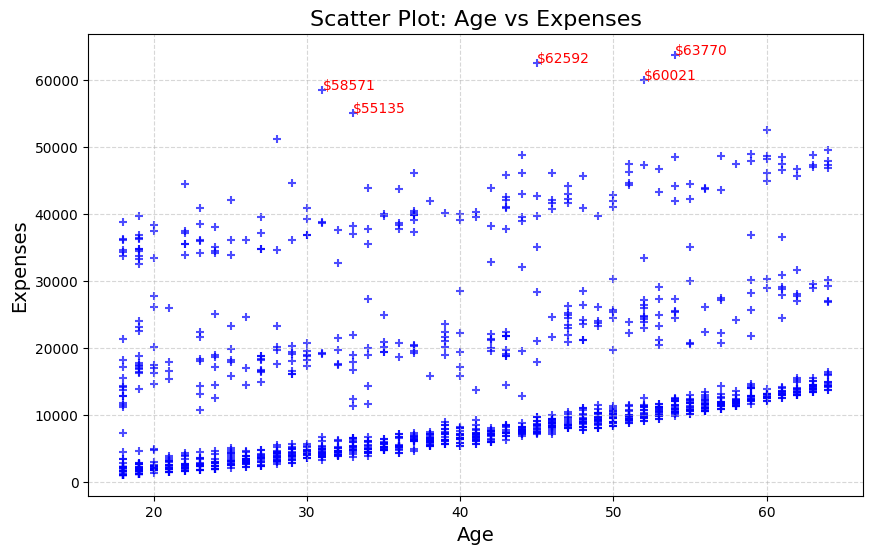

In [16]:
# Scatter plot: Age vs Expenses
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['age'], insurance_data['charges'], c='blue', marker='+', alpha=0.7)

# Customize the plot
plt.title("Scatter Plot: Age vs Expenses", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Expenses", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Add annotations for the highest expenses
top_expenses = insurance_data.nlargest(5, 'charges')
for i in range(len(top_expenses)):
    plt.text(
        top_expenses.iloc[i]['age'],
        top_expenses.iloc[i]['charges'],
        f"${int(top_expenses.iloc[i]['charges'])}",
        fontsize=10,
        color='red'
    )

# Show the plot
plt.show()


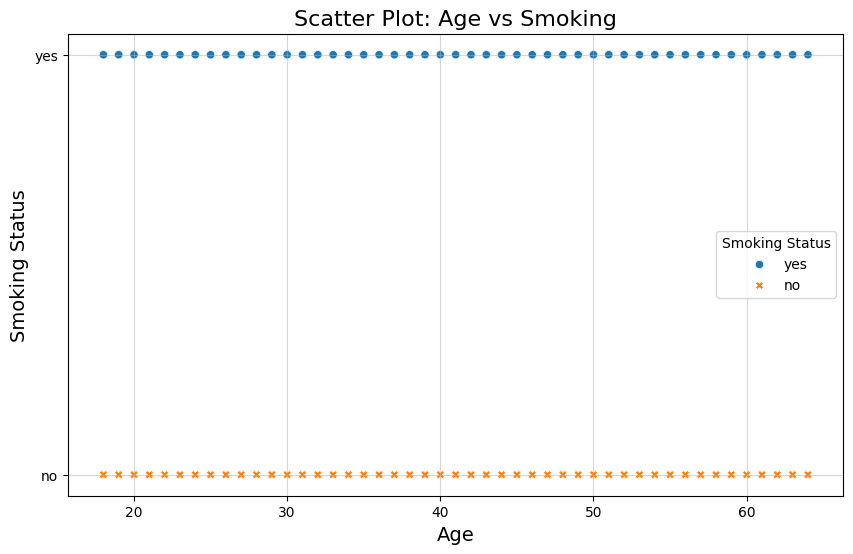

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance_data['age'], y=insurance_data['smoker'], hue=insurance_data['smoker'], style=insurance_data['smoker'])
plt.title("Scatter Plot: Age vs Smoking", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Smoking Status", fontsize=14)
plt.legend(title="Smoking Status")
plt.grid(alpha=0.5)
plt.show()

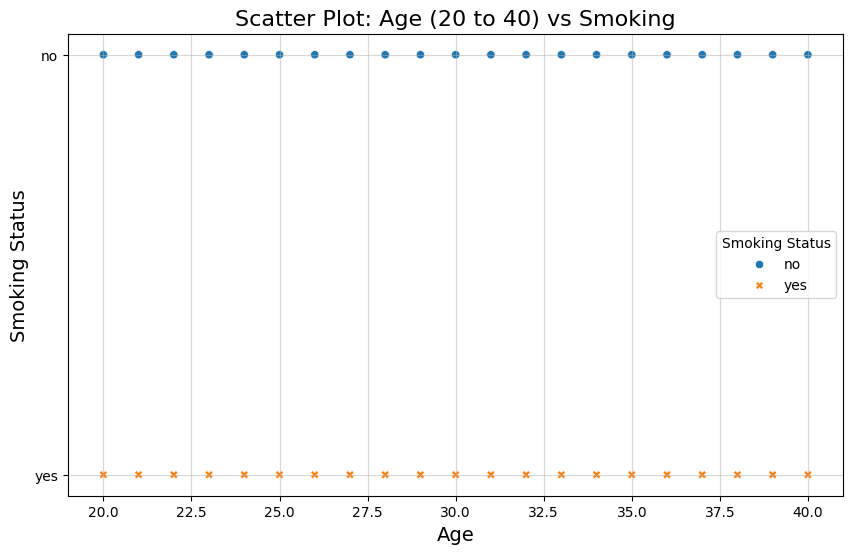

In [18]:
filtered_data = insurance_data[(insurance_data['age'] >= 20) & (insurance_data['age'] <= 40)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['age'], y=filtered_data['smoker'], hue=filtered_data['smoker'], style=filtered_data['smoker'])
plt.title("Scatter Plot: Age (20 to 40) vs Smoking", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Smoking Status", fontsize=14)
plt.legend(title="Smoking Status")
plt.grid(alpha=0.5)
plt.show()


Average Expenses (Smokers vs Non-Smokers):
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


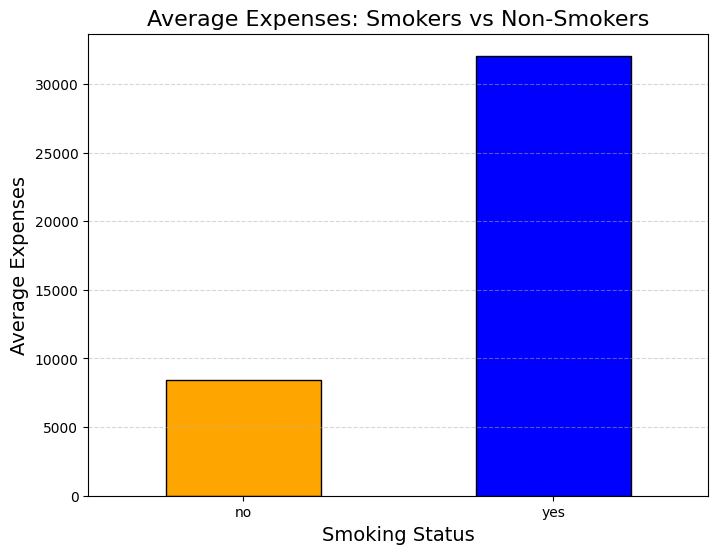

In [19]:
expenses_smoking = insurance_data.groupby('smoker')['charges'].mean()
print("\nAverage Expenses (Smokers vs Non-Smokers):\n", expenses_smoking)

# Plot the results
plt.figure(figsize=(8, 6))
expenses_smoking.plot(kind='bar', color=['orange', 'blue'], edgecolor='black')
plt.title("Average Expenses: Smokers vs Non-Smokers", fontsize=16)
plt.ylabel("Average Expenses", fontsize=14)
plt.xlabel("Smoking Status", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Number of Smokers by Gender:
 sex
female    115
male      159
dtype: int64


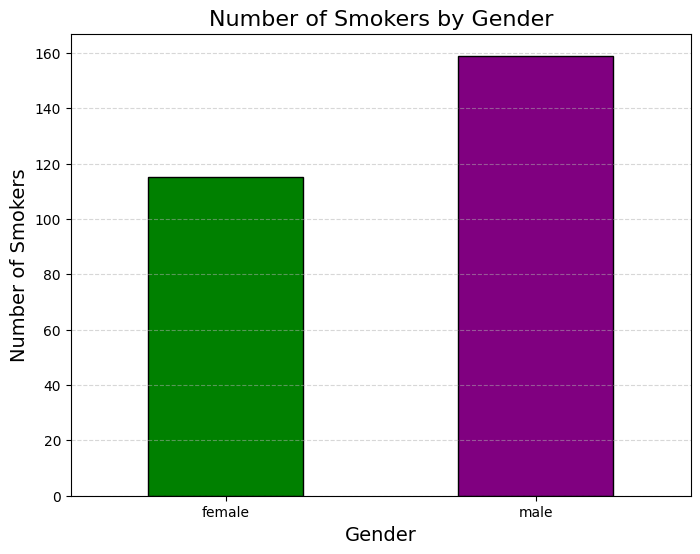

In [20]:
smokers_gender = insurance_data[insurance_data['smoker'] == 'yes'].groupby('sex').size()
print("\nNumber of Smokers by Gender:\n", smokers_gender)

# Plot the results
plt.figure(figsize=(8, 6))
smokers_gender.plot(kind='bar', color=['green', 'purple'], edgecolor='black')
plt.title("Number of Smokers by Gender", fontsize=16)
plt.ylabel("Number of Smokers", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

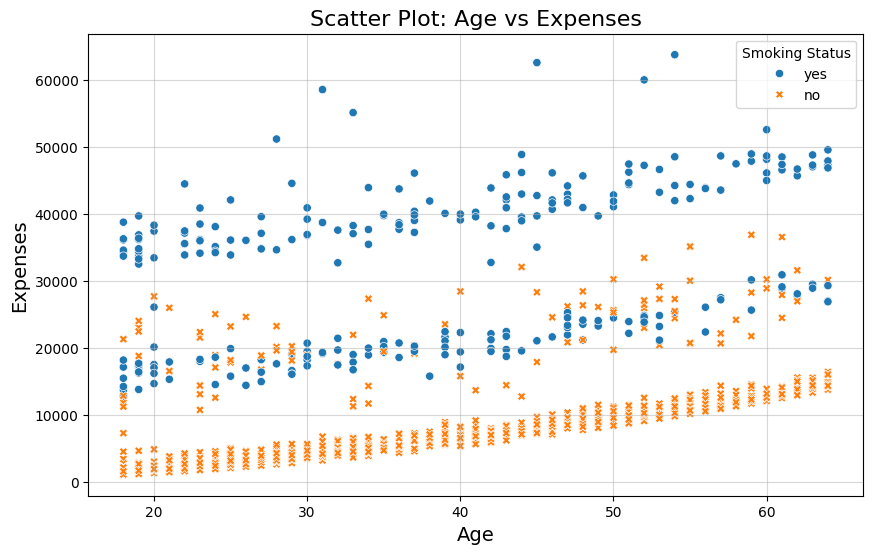

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance_data['age'], y=insurance_data['charges'], hue=insurance_data['smoker'], style=insurance_data['smoker'])
plt.title("Scatter Plot: Age vs Expenses", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Expenses", fontsize=14)
plt.legend(title="Smoking Status")
plt.grid(alpha=0.5)
plt.show()

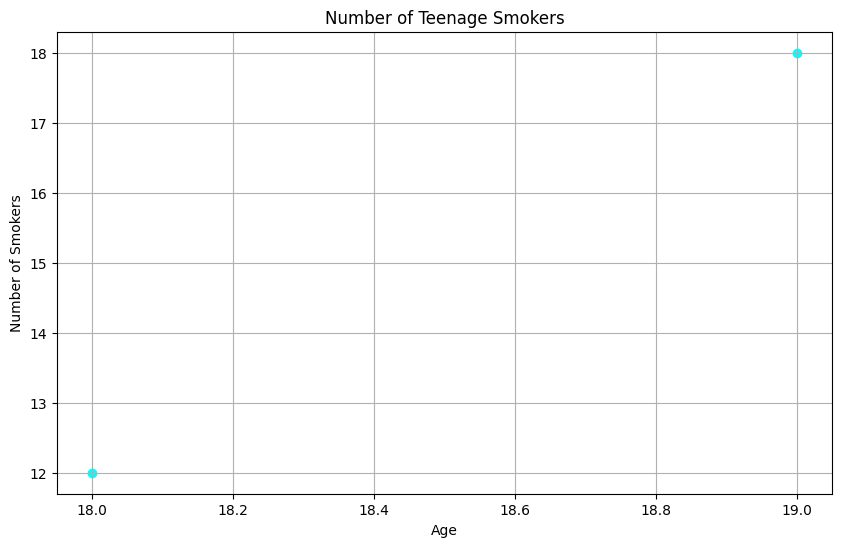

In [24]:
import matplotlib.pyplot as plt

smokers_teenage = dataset[(dataset['age'] >= 13) & (dataset['age'] <= 19) & (dataset['smoker'] == 1)]
smoker_counts = smokers_teenage.groupby('age')['smoker'].count()

plt.figure(figsize=(10, 6))
plt.scatter(smoker_counts.index, smoker_counts.values, color='cyan', marker='o')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.title('Number of Teenage Smokers')
plt.grid(True)
plt.show()
